In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
# Load dataset
df = pd.read_csv('../data/german_credit_data.csv')

# Remove unnecessary column
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

In [62]:
# EDA
print(df.head())
print("\n")
print(df.info())
print("\n")
print(df.describe())
print("\n")
print(df.isnull().sum())
print("\n")
print(df.columns)

   Age  Sex  Job  Housing  Saving accounts  Checking account  Credit amount  \
0   67    1    2        1                4                 0           1169   
1   22    0    2        1                0                 1           5951   
2   49    1    1        1                0                 3           2096   
3   45    1    2        0                0                 0           7882   
4   53    1    2        0                0                 0           4870   

   Duration  Purpose  HighCreditRisk  
0         6        5               0  
1        48        5               1  
2        12        3               0  
3        42        4               1  
4        24        1               1  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1000 non-null   int64
 1   Sex               1000 non-null   int64
 2 

In [85]:
# Fill missing values
df['Saving accounts'].fillna('unknown', inplace=True)
df['Checking account'].fillna('unknown', inplace=True)

# Encode categorical variables
label_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
label_encoders = {col: LabelEncoder().fit(df[col]) for col in label_cols}
for col, le in label_encoders.items():
    df[col] = le.transform(df[col])

# Create binary target
df['HighCreditRisk'] = (df['Credit amount'] > df['Credit amount'].median()).astype(int)
X = df.drop(columns=['Credit amount', 'HighCreditRisk'])
y = df['HighCreditRisk']

# Scale features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<ipython-input-85-dcb36bf29a27>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Saving accounts'].fillna('unknown', inplace=True)
<ipython-input-85-dcb36bf29a27>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

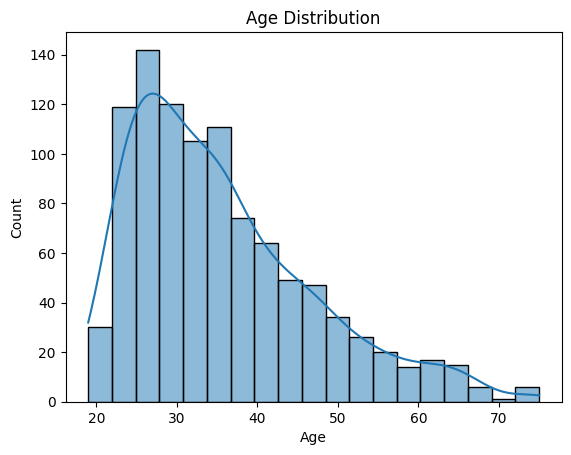

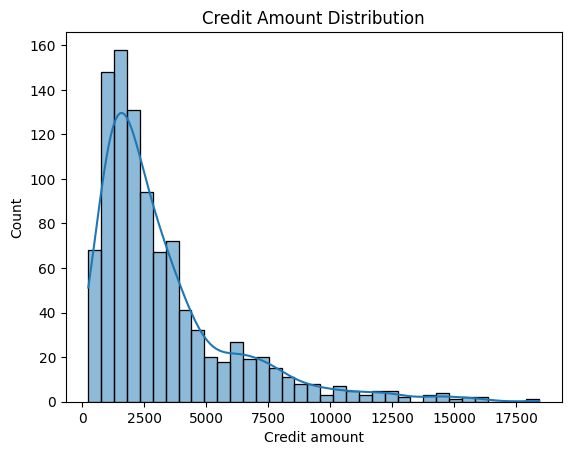

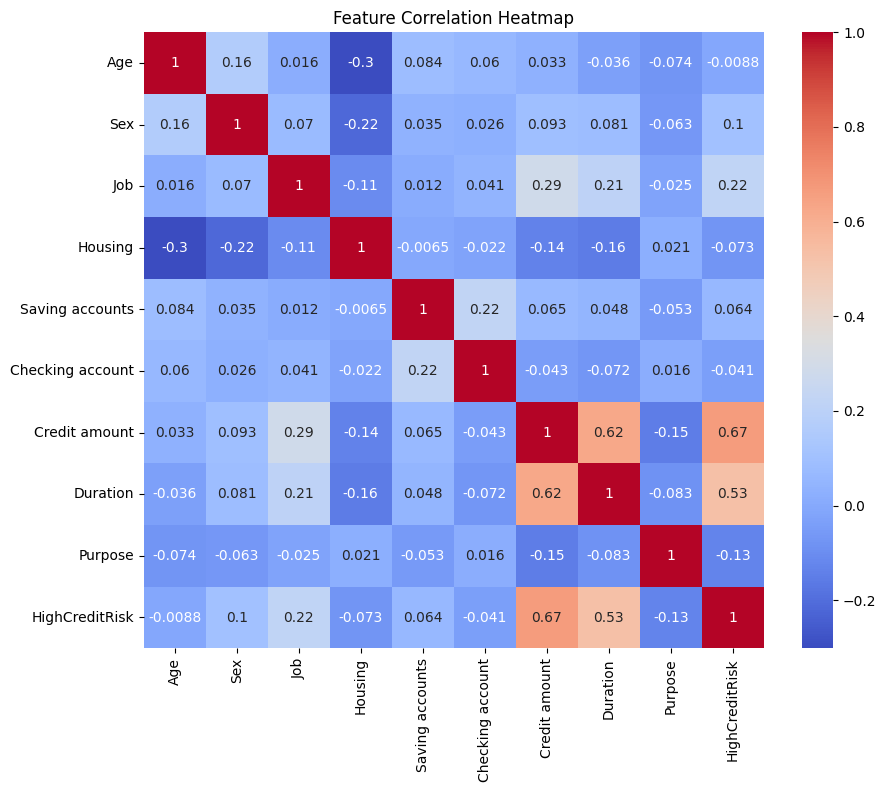

In [86]:
def plot_distribution(col, title):
    sns.histplot(df[col], kde=True)
    plt.title(title)
    plt.show()
    print("\n")

plot_distribution('Age', 'Age Distribution')
plot_distribution('Credit amount', 'Credit Amount Distribution')

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


🔎 Original Random Forest Evaluation
Accuracy:  0.76
Precision: 0.75
Recall:    0.74
F1 Score:  0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       155
           1       0.75      0.74      0.75       145

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



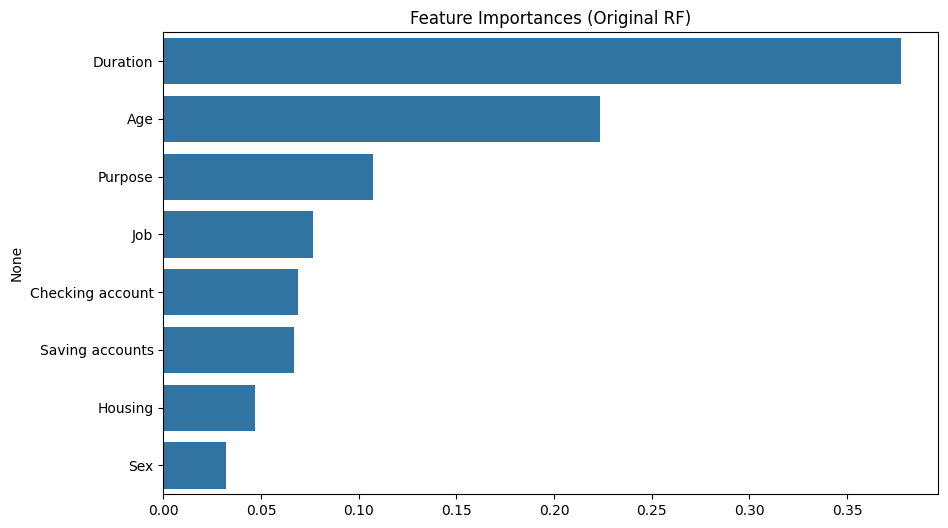

 
🔍 Most Influential Feature: Duration


In [87]:
def evaluate_model(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    print(f"\n🔎 {title}")
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall:    {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score:  {f1_score(y_test, y_pred):.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return y_pred

def plot_feature_importance(model, features, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=features[indices])
    plt.title(title)
    plt.show()
    print(" ")
    print(f"🔍 Most Influential Feature: {features[indices[0]]}")

# Original model
rf = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=15,min_samples_split=2,min_samples_leaf=1)
rf.fit(X_train, y_train)
y_pred = evaluate_model(rf, X_test, y_test, "Original Random Forest Evaluation")
plot_feature_importance(rf, X.columns, "Feature Importances (Original RF)")

In [89]:
import joblib

# Save trained model
joblib.dump(rf, 'model.pkl')

# Save scaler
joblib.dump(scaler, 'scaler.pkl')

# Save label encoders
for col, le in label_encoders.items():
    joblib.dump(le, f'le_{col}.pkl')
